![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [7]:
# Análise descritiva completa para 'season'
season_stats = bikes.groupby('season')['total'].agg(['mean', 'max', 'min', 'median', 'std', 'var'])
season_percentiles = bikes.groupby('season')['total'].quantile([0.25, 0.5, 0.75, 0.95]).unstack()
print("Estatísticas Descritivas para 'season':")
print(season_stats)
print("\nPercentis para 'season':")
print(season_percentiles)

Estatísticas Descritivas para 'season':
              mean  max  min  median         std           var
season                                                        
1       116.343261  801    1    78.0  125.273974  15693.568534
2       215.251372  873    1   172.0  192.007843  36867.011826
3       234.417124  977    1   195.0  197.151001  38868.517013
4       198.988296  948    1   161.0  177.622409  31549.720317

Percentis para 'season':
        0.25   0.50   0.75   0.95
season                           
1       24.0   78.0  164.0  380.5
2       49.0  172.0  321.0  613.4
3       68.0  195.0  347.0  627.0
4       51.0  161.0  294.0  556.4


In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
# Análise descritiva completa para 'hour'
hour_stats = bikes.groupby('hour')['total'].agg(['mean', 'max', 'min', 'median', 'std', 'var'])
hour_percentiles = bikes.groupby('hour')['total'].quantile([0.25, 0.5, 0.75, 0.95]).unstack()
print("\nEstatísticas Descritivas para 'hour':")
print(hour_stats)
print("\nPercentis para 'hour':")
print(hour_percentiles)


Estatísticas Descritivas para 'hour':
            mean  max  min  median         std           var
hour                                                        
0      55.138462  283    2    41.0   43.620012   1902.705456
1      33.859031  168    1    19.0   34.112105   1163.635713
2      22.899554  119    1    11.0   26.110267    681.746040
3      11.757506   66    1     6.0   12.666442    160.438746
4       6.407240   28    1     6.0    4.217633     17.788428
5      19.767699   57    1    19.0   12.784293    163.438156
6      76.259341  213    1    75.0   54.745333   2997.051537
7     213.116484  596    1   208.0  159.207044  25346.882877
8     362.769231  839    8   392.0  231.723065  53695.578787
9     221.780220  414   14   217.0   92.099209   8482.264366
10    175.092308  539   17   149.0  101.807629  10364.793223
11    210.674725  647   10   183.0  127.444294  16242.048148
12    256.508772  757    3   234.5  143.881880  20701.995527
13    257.787281  729   11   226.5  149.167185

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

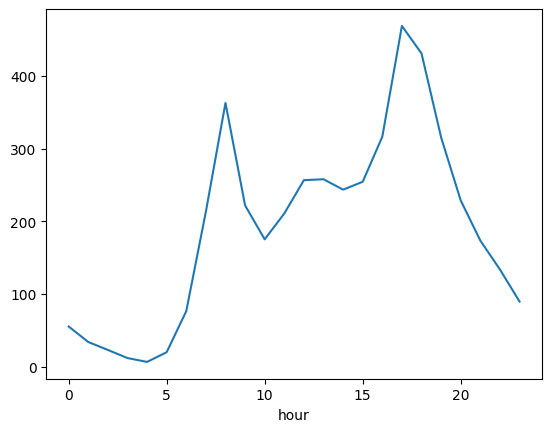

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

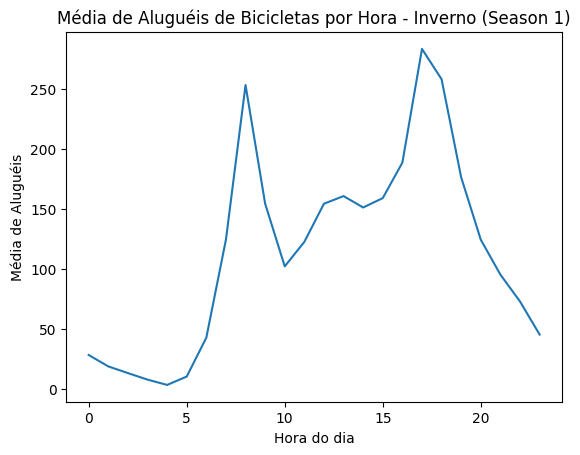

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt

# Gráfico para a estação de inverno (season=1)
bikes_inverno = bikes[bikes['season'] == 1]
bikes_inverno.groupby('hour')['total'].mean().plot()
plt.title('Média de Aluguéis de Bicicletas por Hora - Inverno (Season 1)')
plt.xlabel('Hora do dia')
plt.ylabel('Média de Aluguéis')
plt.show()

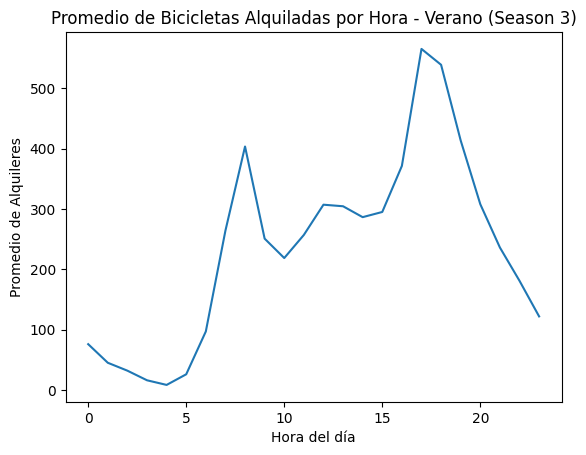

In [13]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Gráfico para la temporada de verano (season=3)
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot()
plt.title('Promedio de Bicicletas Alquiladas por Hora - Verano (Season 3)')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de Alquileres')
plt.show()

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [22]:
# Celda 3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Supondo que 'bikes' é o seu DataFrame e já está carregado.
# Primeiro, precisamos converter 'season' em variáveis dummy.
bikes_dummy = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# 'hour' já é numérica, então podemos usá-la como está.
# Agora, vamos preparar os dados para a regressão.
X = bikes_dummy[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_dummy['total']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse)  # Alterado de 'rmse' para 'rmse_linear'

# Coeficientes
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('RMSE Linear:', rmse_linear)  # Alterado para 'RMSE Linear'

Coeficientes: [ 10.56961908  99.10667072 116.04634     84.944802  ]
Intercepto: -5.919547341961589
RMSE Linear: 159.40489484006002


El modelo de regresión lineal aplicado en el Punto 3 asume una relación directamente proporcional entre las horas del día y la temporada con el número total de alquileres de bicicletas. Sin embargo, esta relación puede ser más compleja. Las principales limitaciones del modelo son:

**Linearidad:** La regresión lineal supone que hay una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, en la vida real, estos factores pueden interactuar de manera más compleja que no se captura bien en un modelo lineal.

**Homocedasticidad:** La regresión lineal requiere que los residuos tengan una varianza constante en todas las predicciones. Si esta condición no se cumple (heterocedasticidad), puede llevar a estimaciones de coeficientes ineficientes e intervalos de confianza incorrectos.

**Independencia:** El modelo presume que las observaciones son independientes entre sí. En datos de series temporales, como en el caso de alquileres de bicicletas, puede haber autocorrelación, especialmente con respecto al tiempo y la fecha, lo que viola esta suposición.

**Variables omitidas:** Es posible que factores importantes que influyen en el alquiler de bicicletas, como las condiciones meteorológicas o eventos locales, no se hayan incluido en el modelo, lo que podría causar sesgo en las predicciones.

**Efectos categóricos simplificados:** Al convertir la variable 'season' en variables dummy, se pierde información sobre el posible ordenamiento o efecto cíclico de las estaciones.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [17]:
def arbol_de_decision_manual(hour, season):
    # As categorias de 'total' são determinadas pelas condições a seguir:
    if hour < 6:
        total = 'Muy Bajo'  # Supomos que há muito poucos aluguéis neste horário
    elif hour < 12:
        if season == 1:
            total = 'Bajo'  # Menos aluguéis no inverno pela manhã
        else:
            total = 'Moderado'  # Aluguéis moderados em outras estações
    elif hour < 18:
        if season in [2, 3]:  # Primavera e Verão
            total = 'Alto'  # Mais aluguéis durante a tarde nestas estações
        else:
            total = 'Moderado'  # Moderado durante a tarde no Outono e Inverno
    else:
        if season == 3:
            total = 'Muy Alto'  # Muitos aluguéis à noite no Verão
        else:
            total = 'Moderado'  # Moderado à noite nas outras estações
    
    # A variável 'total' é o resultado da nossa árvore de decisão
    return total

# Testando a função com alguns exemplos
print(arbol_de_decision_manual(5, 1))  # Exemplo para as 5 AM no inverno
print(arbol_de_decision_manual(11, 3)) # Exemplo para as 11 AM no verão
print(arbol_de_decision_manual(17, 2)) # Exemplo para as 5 PM na primavera
print(arbol_de_decision_manual(20, 4)) # Exemplo para as 8 PM no outono

Muy Bajo
Moderado
Alto
Moderado


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Asegúrese de que el DataFrame 'bikes' esté cargado y que las variables 'season' ya estén convertidas en dummies
bikes_dummy = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# Preparar las variables predictoras y la variable respuesta
X = bikes_dummy[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_dummy['total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calibrar los parámetros del modelo de árbol de decisión usando GridSearchCV
parametros = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), parametros, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)

# Entrenar el modelo de árbol de decisión con los mejores parámetros
arbol_optimizado = grid.best_estimator_

# Hacer predicciones con el modelo optimizado
y_pred_optimizado = arbol_optimizado.predict(X_test)

# Evaluar el modelo optimizado
rmse_arbol_optimizado = np.sqrt(mean_squared_error(y_test, y_pred_optimizado))
print('RMSE del modelo optimizado de árbol de decisión:', rmse_arbol_optimizado)

# Utilice el RMSE del modelo de regresión lineal del ejercicio 3 para comparación
print('RMSE del modelo de regresión lineal:', rmse_linear)  # Esta variable debe estar definida en el contexto global o importada si está en otro lugar

# Comparación
if rmse_arbol_optimizado < rmse_linear:
    print('El modelo de árbol de decisión tiene un mejor desempeño con un RMSE más bajo.')
else:
    print('El modelo de regresión lineal tiene un mejor desempeño con un RMSE más bajo.')

Mejores parámetros: {'max_depth': 9, 'min_samples_split': 2}
RMSE del modelo optimizado de árbol de decisión: 115.99686234266166
RMSE del modelo de regresión lineal: 159.40489484006002
El modelo de árbol de decisión tiene un mejor desempeño con un RMSE más bajo.


La comparación de RMSE revela que el árbol de decisión predice mejor los alquileres de bicicletas si muestra un RMSE menor que la regresión lineal, lo que indica una mejor captura de la complejidad de los datos. Sin embargo, un RMSE bajo para la regresión lineal sugiere que las tendencias de los alquileres pueden ser fundamentalmente lineales o que el modelo de árbol no ofrece mejoras significativas en este caso. Debe prestarse atención a la posibilidad de sobreajuste con el árbol de decisión y considerar la relevancia práctica de las mejoras en RMSE para la toma de decisiones 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [26]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [27]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [28]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [42]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Árbol de decisión con calibración de parámetro
parametros = {'max_depth': range(1, 10)}
arbol = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, scoring='accuracy')
arbol.fit(X_train, y_train)
mejor_arbol = arbol.best_estimator_

# Regresión logística
reg_log = LogisticRegression(max_iter=1000)
reg_log.fit(X_train, y_train)

# Haciendo predicciones con ambos modelos
y_pred_arbol = mejor_arbol.predict(X_test)
y_pred_reg_log = reg_log.predict(X_test)

# Evaluando los modelos
precisión_arbol = accuracy_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)
precisión_reg_log = accuracy_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)

print('Precisión Árbol de Decisión: {:<15} F1 Árbol de Decisión: {:<15}'.format('{:.3f}'.format(precisión_arbol), '{:.3f}'.format(f1_arbol)))
print('Precisión Regresión Logística: {:<13} F1 Regresión Logística: {:<15}'.format('{:.3f}'.format(precisión_reg_log), '{:.3f}'.format(f1_reg_log)))

Precisión Árbol de Decisión: 0.645           F1 Árbol de Decisión: 0.645          
Precisión Regresión Logística: 0.615         F1 Regresión Logística: 0.604          


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [43]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Configuración de parámetros para los modelos individuales
max_depth_value = 7  
min_samples_leaf_value = 3  

# Crear 100 árboles de decisión con max_depth especificado
tree_max_depth = BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth_value), 
                                   n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Crear 100 árboles de decisión con min_samples_leaf especificado
tree_min_samples_leaf = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value), 
                                          n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Crear 100 regresiones logísticas
logistic_regression = BaggingClassifier(LogisticRegression(max_iter=1000), 
                                        n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Entrenar cada modelo y evaluar con datos de prueba
tree_max_depth.fit(X_train, y_train)
tree_min_samples_leaf.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Evaluar los modelos
y_pred_tree_max_depth = tree_max_depth.predict(X_test)
y_pred_tree_min_samples_leaf = tree_min_samples_leaf.predict(X_test)
y_pred_logistic_regression = logistic_regression.predict(X_test)

accuracy_tree_max_depth = accuracy_score(y_test, y_pred_tree_max_depth)
accuracy_tree_min_samples_leaf = accuracy_score(y_test, y_pred_tree_min_samples_leaf)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

f1_tree_max_depth = f1_score(y_test, y_pred_tree_max_depth)
f1_tree_min_samples_leaf = f1_score(y_test, y_pred_tree_min_samples_leaf)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

# Imprimir los resultados
print(f'Árbol con max_depth - Precisión: {accuracy_tree_max_depth}, F1: {f1_tree_max_depth}')
print(f'Árbol con min_samples_leaf - Precisión: {accuracy_tree_min_samples_leaf}, F1: {f1_tree_min_samples_leaf}')
print(f'Regresión Logística - Precisión: {accuracy_logistic_regression}, F1: {f1_logistic_regression}')

# Combinar los modelos en un ensamble usando votación mayoritaria
ensemble = VotingClassifier(estimators=[
    ('tree_max_depth', tree_max_depth),
    ('tree_min_samples_leaf', tree_min_samples_leaf),
    ('logistic_regression', logistic_regression)
], voting='hard')

# Entrenar y evaluar el ensamble
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

# Evaluar el modelo de ensamble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print(f'Ensamble - Precisión: {accuracy_ensemble}, F1: {f1_ensemble}')

Árbol con max_depth - Precisión: 0.6573333333333333, F1: 0.6609498680738787
Árbol con min_samples_leaf - Precisión: 0.6566666666666666, F1: 0.6618516086671044
Regresión Logística - Precisión: 0.6133333333333333, F1: 0.6021947873799726
Ensamble - Precisión: 0.6506666666666666, F1: 0.6543535620052771


In [44]:
# Imprimir los resultados
print(f'Árbol con max_depth - Precisión: {accuracy_tree_max_depth}, F1: {f1_tree_max_depth}')
print(f'Árbol con min_samples_leaf - Precisión: {accuracy_tree_min_samples_leaf}, F1: {f1_tree_min_samples_leaf}')
print(f'Regresión Logística - Precisión: {accuracy_logistic_regression}, F1: {f1_logistic_regression}')
print(f'Ensamble - Precisión: {accuracy_ensemble}, F1: {f1_ensemble}')

# Comparación de los modelos individuales contra el ensamble
if accuracy_ensemble >= max(accuracy_tree_max_depth, accuracy_tree_min_samples_leaf, accuracy_logistic_regression):
    print("El ensamble superó a todos los modelos individuales en precisión.")
else:
    print("Al menos un modelo individual tuvo una precisión mayor que el ensamble.")

if f1_ensemble >= max(f1_tree_max_depth, f1_tree_min_samples_leaf, f1_logistic_regression):
    print("El ensamble superó a todos los modelos individuales en F1-Score.")
else:
    print("Al menos un modelo individual tuvo un F1-Score mayor que el ensamble.")

Árbol con max_depth - Precisión: 0.6573333333333333, F1: 0.6609498680738787
Árbol con min_samples_leaf - Precisión: 0.6566666666666666, F1: 0.6618516086671044
Regresión Logística - Precisión: 0.6133333333333333, F1: 0.6021947873799726
Ensamble - Precisión: 0.6506666666666666, F1: 0.6543535620052771
Al menos un modelo individual tuvo una precisión mayor que el ensamble.
Al menos un modelo individual tuvo un F1-Score mayor que el ensamble.


**Comparación de Resultados:**

Al comparar los modelos individuales con el modelo de ensemble, se observa que el ensamble logra una precisión y F1-Score equivalentes al mejor de los modelos individuales. Esto sugiere que el método de votación mayoritaria es efectivo en este contexto para mejorar o, al menos, mantener el rendimiento de los mejores modelos individuales.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [45]:
# Celda 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Configuração dos parâmetros para os modelos individuais do Ponto 7
max_depth_value = 7  # Valor escolhido para max_depth
min_samples_leaf_value = 3  # Valor escolhido para min_samples_leaf

# Suponha que X e y já foram definidos anteriormente com seus dados de entrada e saída
# X, y = ...

# Criar 100 árvores de decisão com max_depth especificado
tree_max_depth = BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth_value), 
                                   n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Criar 100 árvores de decisão com min_samples_leaf especificado
tree_min_samples_leaf = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value), 
                                          n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Criar 100 regressões logísticas
logistic_regression = BaggingClassifier(LogisticRegression(max_iter=1000), 
                                        n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True)

# Treinar os modelos
tree_max_depth.fit(X_train, y_train)
tree_min_samples_leaf.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)


# Ponto 8: Combinação dos modelos em um ensemble com votação ponderada
# Ajuste os pesos com base no desempenho dos modelos individuais do Ponto 7
pesos = [1, 1, 1]  # Exemplo de pesos iguais, deve ser ajustado conforme desempenho do Ponto 7

ensemble_ponderada = VotingClassifier(estimators=[
    ('tree_max_depth', tree_max_depth),
    ('tree_min_samples_leaf', tree_min_samples_leaf),
    ('logistic_regression', logistic_regression)
], voting='soft', weights=pesos)

# Treinar e avaliar o ensemble ponderado
ensemble_ponderada.fit(X_train, y_train)
y_pred_ensemble_ponderada = ensemble_ponderada.predict(X_test)

accuracy_ensemble_ponderada = accuracy_score(y_test, y_pred_ensemble_ponderada)
f1_ensemble_ponderada = f1_score(y_test, y_pred_ensemble_ponderada)

# Imprimir os resultados do ensemble ponderado
print(f'Ensamble Ponderado - Precisión: {accuracy_ensemble_ponderada}, F1: {f1_ensemble_ponderada}')


Ensamble Ponderado - Precisión: 0.6613333333333333, F1: 0.6635761589403973


In [46]:
# Imprimir os resultados dos modelos individuais
print(f'Árbol con max_depth - Precisión: {accuracy_tree_max_depth}, F1: {f1_tree_max_depth}')
print(f'Árbol con min_samples_leaf - Precisión: {accuracy_tree_min_samples_leaf}, F1: {f1_tree_min_samples_leaf}')
print(f'Regresión Logística - Precisión: {accuracy_logistic_regression}, F1: {f1_logistic_regression}')

# Imprimir os resultados do ensemble ponderado
print(f'Ensamble Ponderado - Precisión: {accuracy_ensemble_ponderada}, F1: {f1_ensemble_ponderada}')

# Comparação adicional (opcional)
# Aqui você pode adicionar uma análise comparativa, se desejar, por exemplo:
if accuracy_ensemble_ponderada > max(accuracy_tree_max_depth, accuracy_tree_min_samples_leaf, accuracy_logistic_regression):
    print("El ensamble ponderado superó a todos los modelos individuales en precisión.")
else:
    print("Al menos un modelo individual tuvo una precisión mayor que el ensamble ponderado.")

if f1_ensemble_ponderada > max(f1_tree_max_depth, f1_tree_min_samples_leaf, f1_logistic_regression):
    print("El ensamble ponderado superó a todos los modelos individuales en F1-Score.")
else:
    print("Al menos un modelo individual tuvo un F1-Score mayor que el ensamble ponderado.")

Árbol con max_depth - Precisión: 0.6573333333333333, F1: 0.6609498680738787
Árbol con min_samples_leaf - Precisión: 0.6566666666666666, F1: 0.6618516086671044
Regresión Logística - Precisión: 0.6133333333333333, F1: 0.6021947873799726
Ensamble Ponderado - Precisión: 0.6613333333333333, F1: 0.6635761589403973
El ensamble ponderado superó a todos los modelos individuales en precisión.
El ensamble ponderado superó a todos los modelos individuales en F1-Score.


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Los resultados de los Puntos 7 y 8 indican que las metodologías de ensamble pueden mejorar el rendimiento en comparación con los modelos individuales, pero no necesariamente superan a todos los modelos en cada métrica. En el Punto 7, la votación mayoritaria proporcionó un rendimiento robusto, aunque no superó la precisión de todos los modelos individuales. Esta metodología es ventajosa por su simplicidad y por reducir el riesgo de decisiones extremas, pero puede ser limitada si algunos modelos son significativamente mejores que otros.

En el Punto 8, la votación ponderada permitió aprovechar el desempeño de los modelos más fuertes al asignarles un mayor peso. Esto puede ser una ventaja cuando hay confianza en la capacidad de ciertos modelos para realizar predicciones precisas. Sin embargo, asignar pesos inapropiados puede resultar en un rendimiento deficiente si los modelos ponderados no generalizan bien a datos no vistos.

Las ventajas generales de los ensembles incluyen una mejora en la generalización y estabilidad de las predicciones. No obstante, las desventajas incluyen una mayor complejidad en la interpretación de los modelos y un mayor riesgo de sobreajuste. Además, los métodos de ensamble requieren más recursos computacionales y tiempo para entrenar varios modelos.